# Projected Cartopy Map

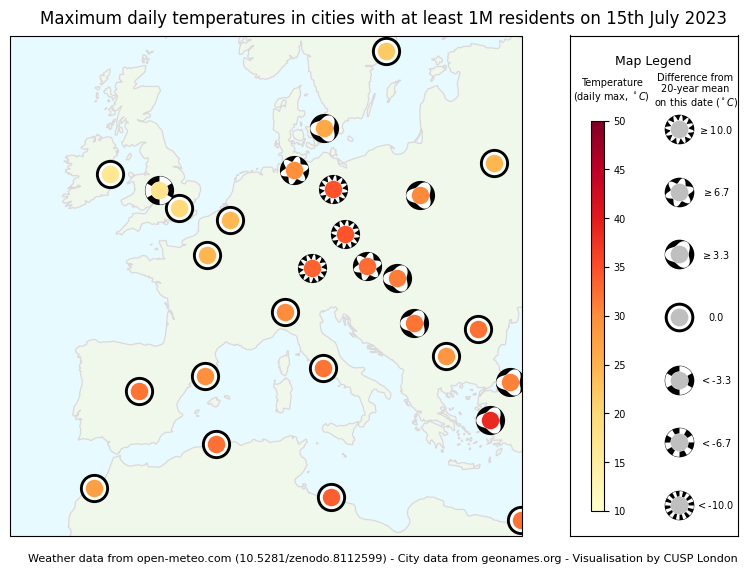

In [1]:
import pandas as pd
from vizent import vizent_plot
import matplotlib.text as text
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('sample-data/temperatures.csv')

# Use cartopy projection to web mercator
crs = ccrs.epsg(3857)
projected_points = crs.transform_points(x=df['longitude'], y=df['latitude'], src_crs=4326)
x = projected_points[:, 0]
y = projected_points[:, 1]

fig = vizent_plot(x, y, df['temperature_2m_max'], df['diff'], [21] * df.shape[0], use_cartopy=True,
                  cartopy_projection = crs, extent=[-15, 30, 30, 60], shape_max=10, shape_min=-10, shape_n=4,
                  interval_type='limit',color_min=10, color_max=50, colormap='YlOrRd', 
                  color_label='Temperature\n(daily max, $^\circ C$)', 
                  shape_label='Difference from\n20-year mean\non this date ($^\circ C$)',
                  glyph_legend_title='Map Legend', label_fontsize=7)

# Add inequalities to shape legend to emphasise limit/threshold approach to intervals.
for child in fig.axes[0].get_children():
    if type(child)==text.Annotation:
        if child.get_text()[0] == '-':
            child.set_text('$<$' + child.get_text())
        else:
            try: 
                value = int(child.get_text()[0])
                if value != 0:
                    child.set_text('$\geq$' + child.get_text())
            except:
                pass

fig.suptitle('Maximum daily temperatures in cities with at least 1M residents on 15th July 2023', y=0.92)

plt.text(x=0.145,
        y=0.07, 
        s="Weather data from open-meteo.com (10.5281/zenodo.8112599) - City data from geonames.org - Visualisation by CUSP London", 
        transform=fig.transFigure, 
        fontsize=8)

fig.set_size_inches(10, 6.5)
